<a href="https://colab.research.google.com/github/max777888/SpotifyDatasetAnalysis/blob/main/spotify_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import os

# Step 2: Upload the ZIP file
print("Please upload the dataset ZIP file")
uploaded = files.upload()

Please upload the dataset ZIP file


Saving archive.zip to archive.zip


In [6]:
# Step 3: Extract the ZIP file
zip_file_name = list(uploaded.keys())[0]  # Get the name of the uploaded ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extract to a folder named 'dataset'

# List extracted files
extracted_files = os.listdir('dataset')
print("Extracted files:", extracted_files)

# Step 4: Load the dataset
# Replace 'train.csv' with the name of your CSV file from the extracted files
data_file = 'dataset/spotify_dataset.csv'  # Adjust based on your dataset
df = pd.read_csv(data_file)



Extracted files: ['spotify_dataset.csv', '900k Definitive Spotify Dataset.json']

First 5 rows of the dataset:
  Artist(s)                       song  \
0       !!!  Even When the Waters Cold   
1       !!!         One Girl / One Boy   
2       !!!          Pardon My Freedom   
3       !!!                        Ooo   
4       !!!                 Freedom 15   

                                                text Length  emotion    Genre  \
0  Friends told her she was better off at the bot...  03:47  sadness  hip hop   
1  Well I heard it, playing soft From a drunken b...  04:03  sadness  hip hop   
2  Oh my god, did I just say that out loud? Shoul...  05:51      joy  hip hop   
3  [Verse 1] Remember when I called you on the te...  03:44      joy  hip hop   
4  [Verse 1] Calling me like I got something to s...  06:00      joy  hip hop   

           Album Release Date     Key     Tempo  ...  \
0       Thr!!!er   2013-04-29   D min  0.437870  ...   
1       Thr!!!er   2013-04-29  A# min

In [14]:
# check the columns
print(df.columns)

print(df.columns.tolist())

# Step 5: Initial Exploration
# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Index(['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album',
       'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature',
       'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')
['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album', 'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature', 'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', '

In [25]:
# Display the first 5 rows of relevant columns
print(df[['Artist(s)', 'song', 'text', 'Length']].head())

  Artist(s)                       song  \
0       !!!  Even When the Waters Cold   
1       !!!         One Girl / One Boy   
2       !!!          Pardon My Freedom   
3       !!!                        Ooo   
4       !!!                 Freedom 15   

                                                text Length  
0  Friends told her she was better off at the bot...  03:47  
1  Well I heard it, playing soft From a drunken b...  04:03  
2  Oh my god, did I just say that out loud? Shoul...  05:51  
3  [Verse 1] Remember when I called you on the te...  03:44  
4  [Verse 1] Calling me like I got something to s...  06:00  


In [37]:
# Inspect dataset and Genre column
print("\nColumns:", df.columns)
print("\nSample Data:")
print(df[['Artist(s)', 'song', 'text', 'Genre', 'Length']].head(5))
print("\nGenre Column Types:")
print(df['Genre'].apply(type).value_counts())
print("\nSample Genre Values:")
print(df['Genre'].head(10))



Columns: Index(['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album',
       'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature',
       'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3', 'lyrics'],
      dtype='object')

Sample Data:
  Artist(s)                       song  \
0       !!!  Even When the Waters Cold   
1       !!!         One Girl / One Boy   
2       !!!          Pardon My Freedom   
3       !!!                   

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:

# Step 2: Preprocess lyrics and genre
# Lyrics (assuming 'text' contains lyrics)
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
lyrics_matrix = vectorizer.fit_transform(df['text'].fillna('')).toarray()
print("\nLyrics Matrix Shape:", lyrics_matrix.shape)

print("Initial Genre Data Types:")
print(df['Genre'].apply(type).unique())

# Step 2: Preprocess lyrics and genre
# Lyrics (assuming 'text' contains lyrics)
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
lyrics_matrix = vectorizer.fit_transform(df['text'].fillna('')).toarray()
print("\nLyrics Matrix Shape:", lyrics_matrix.shape)

# Genre preprocessing
def preprocess_genre(genre):
    # Handle None, NaN, or empty lists
    if genre is None or (isinstance(genre, list) and not genre) :
        return []
    # Handle lists (including nested lists)
    if isinstance(genre, list):
        # Flatten nested lists and convert to strings
        flat_genres = []
        for g in genre:
            if isinstance(g, list):
                flat_genres.extend([str(gg).strip() for gg in g if gg])
            else:
                flat_genres.append(str(g).strip())
        return [g for g in flat_genres if g]
    # Handle strings (e.g., "metal, thrash")
    if isinstance(genre, str):
        return [g.strip() for g in genre.split(',') if g.strip()]
    # Handle other types (e.g., numbers, arrays)
    return [str(genre).strip()]

df['Genre_processed'] = df['Genre'].apply(preprocess_genre)
# Debug: Check processed genres
print("\nSample Processed Genres:")
print(df['Genre_processed'].head(10))

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['Genre_processed'])
print("\nGenre Features:", mlb.classes_)
print("Genre Matrix Shape:", genre_matrix.shape)

# Combine features (lyrics + genre, genre weighted at 70%)
combined_features = np.hstack([lyrics_matrix, genre_matrix * 0.7])
print("Combined Features Shape:", combined_features.shape)


Lyrics Matrix Shape: (498052, 500)
Initial Genre Data Types:
[<class 'list'>]

Lyrics Matrix Shape: (498052, 500)

Sample Processed Genres:
0    [hip hop]
1    [hip hop]
2    [hip hop]
3    [hip hop]
4    [hip hop]
5    [hip hop]
6    [hip hop]
7    [hip hop]
8    [hip hop]
9    [hip hop]
Name: Genre_processed, dtype: object

Genre Features: ['acoustic' 'alt-country' 'alternative' 'alternative rock' 'ambient'
 'black metal' 'blues' 'britpop' 'chillout' 'chillwave' 'christian'
 'classic rock' 'classical' 'cloud rap' 'comedy' 'country' 'dance'
 'dancehall' 'death metal' 'deathcore' 'disco' 'doom metal' 'dream pop'
 'drum and bass' 'dub' 'dubstep' 'electro' 'electronic' 'electropop' 'emo'
 'emo rap' 'experimental' 'folk' 'funk' 'garage rock' 'gospel' 'grime'
 'grunge' 'hard rock' 'hardcore' 'heavy metal' 'hip hop' 'hip-hop' 'house'
 'indie' 'indie pop' 'indie rock' 'industrial' 'j-pop' 'jazz' 'k-pop'
 'latin' 'lo-fi' 'math rock' 'melodic death metal' 'metal' 'metalcore'
 'new wave' 'nu m

In [44]:

# Step 3: Recommendation function
def recommend_song(song_name, data, features, top_n=1):
    try:
        # Find the input song index (case-insensitive)
        song_idx = data[data['song'].str.lower() == song_name.lower()].index[0]

        # Compute cosine similarity
        similarities = cosine_similarity([features[song_idx]], features)[0]

        # Debug: Print top similarities
        top_indices = similarities.argsort()[-top_n-2:-1][::-1]
        print("\nDebug: Top similarity scores:", similarities[top_indices])
        print("Debug: Input song index:", song_idx, "Excluded from:", top_indices)

        # Get top similar songs (excluding input song)
        similar_indices = similarities.argsort()[-top_n-2:-2][::-1]

        # Filter for metal genres
        recommendations = data.iloc[similar_indices]
        recommendations = recommendations[recommendations['Genre_processed'].apply(
            lambda x: any('metal' in g.lower() for g in x)
        )]

        if recommendations.empty:
            return "No similar metal songs found."
        return recommendations[['song', 'Artist(s)', 'Genre']]
    except IndexError:
        return "Song not found in dataset."

In [46]:
import ipywidgets as widgets
from IPython.display import display
# ... rest of your code ...

# Step 4: Test recommendation
print("\nRecommendation for 'Ghosts Of War':")
print(recommend_song("Ghosts Of War", df, combined_features))

# Step 5: Interactive interface
song_input = widgets.Text(value='', description='Song Name:')
button = widgets.Button(description='Recommend')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        recommendations = recommend_song(song_input.value, df, combined_features)
        print("Recommended Songs:")
        print(recommendations)

button.on_click(on_button_clicked)
display(song_input, button, output)


Recommendation for 'Ghosts Of War':

Debug: Top similarity scores: [0.9802124 0.8273659]
Debug: Input song index: 387654 Excluded from: [387756 460900]
                        song Artist(s)                               Genre
460900  Rise Above the Tides   Trivium  [heavy metal, thrash metal, metal]


Text(value='', description='Song Name:')

Button(description='Recommend', style=ButtonStyle())

Output()

In [11]:
# Step 6: Verify Genre column exists
genre_column = None
for col in df.columns:
    if 'genre' in col.lower():
        genre_column = col
        break

if genre_column:
    # Count metal songs based on genre
    metal_songs = df[df[genre_column].str.contains('metal', case=False, na=False)]
    num_metal_songs = len(metal_songs)
    print(f"\nFound {num_metal_songs} metal songs based on genre column '{genre_column}'")

    # Display unique genre values containing 'metal'
    if num_metal_songs > 0:
        unique_metal_genres = metal_songs[genre_column].unique()
        print("\nUnique genres containing 'metal':")
        print(unique_metal_genres)

        # Display sample of metal songs
        print("\nSample of metal songs:")
        print(metal_songs.head())
    else:
        print("\nNo metal songs found. Checking all unique genres:")
        print(df[genre_column].value_counts())
else:
    print("\nNo 'Genre' column found. Consider feature-based filtering.")
    print("Columns available:", df.columns.tolist())
    print("\nTo filter by features (e.g., high Energy, low Danceability), add the following:")
    print("metal_criteria = (df['Energy'] > 80) & (df['Loudness (db)'] > 0.8) & (df['Danceability'] < 50) & (df['Acousticness'] < 20)")
    print("metal_songs = df[metal_criteria]")

# Step 7: Save and download metal songs
if len(metal_songs) > 0:
    metal_songs.to_csv('metal_songs.csv', index=False)
    print("\nMetal songs saved as 'metal_songs.csv'")
    files.download('metal_songs.csv')
else:
    print("\nNo metal songs to save.")


Found 30711 metal songs based on genre column 'Genre'

Unique genres containing 'metal':
['metal,hard rock,heavy metal' 'rock,alternative rock,metal'
 'metal,black metal' 'nu metal' 'black metal,doom metal,metal'
 'heavy metal,nu metal' 'power metal' 'hardcore,metal,metalcore'
 'melodic death metal,metal' 'nu metal,hard rock,metal'
 'rock,metal,death metal' 'metal,alternative,progressive rock'
 'death metal,black metal,deathcore' 'metal,blues'
 'heavy metal,metal,power metal' 'melodic death metal,metal,death metal'
 'punk,metalcore,punk rock' 'black metal' 'death metal' 'metal'
 'death metal,metal' 'doom metal' 'rock,heavy metal,metal'
 'heavy metal,thrash metal,metal' 'rock,heavy metal,hard rock'
 'death metal,black metal' 'metal,nu metal'
 'rock,progressive rock,heavy metal'
 'death metal,thrash metal,progressive metal' 'heavy metal'
 'alternative rock,hard rock,nu metal' 'alternative rock,nu metal'
 'metalcore,post-hardcore' 'hard rock,heavy metal' 'melodic death metal'
 'metal,dea

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!pip install pandas numpy scikit-learn lyricsgenius

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [7]:
# Dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498052 entries, 0 to 498051
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       498052 non-null  object 
 1   song                            498038 non-null  object 
 2   text                            498052 non-null  object 
 3   Length                          498052 non-null  object 
 4   emotion                         498052 non-null  object 
 5   Genre                           498052 non-null  object 
 6   Album                           498003 non-null  object 
 7   Release Date                    350369 non-null  object 
 8   Key                             498052 non-null  object 
 9   Tempo                           498052 non-null  float64
 10  Loudness (db)                   498052 non-null  float64
 11  Time signature                  498044 non-null  object 
 12  E


Missing Values After Cleaning:
Artist(s)                              0
song                                  14
text                                   0
Length                                 0
emotion                                0
Genre                                  0
Album                                 49
Release Date                      147683
Key                                    0
Tempo                                  0
Loudness (db)                          0
Time signature                         8
Explicit                               0
Popularity                             0
Energy                                 0
Danceability                           0
Positiveness                           0
Speechiness                            0
Liveness                               0
Acousticness                           0
Instrumentalness                       0
Good for Party                         0
Good for Work/Study                    0
Good for Relaxation/Medit

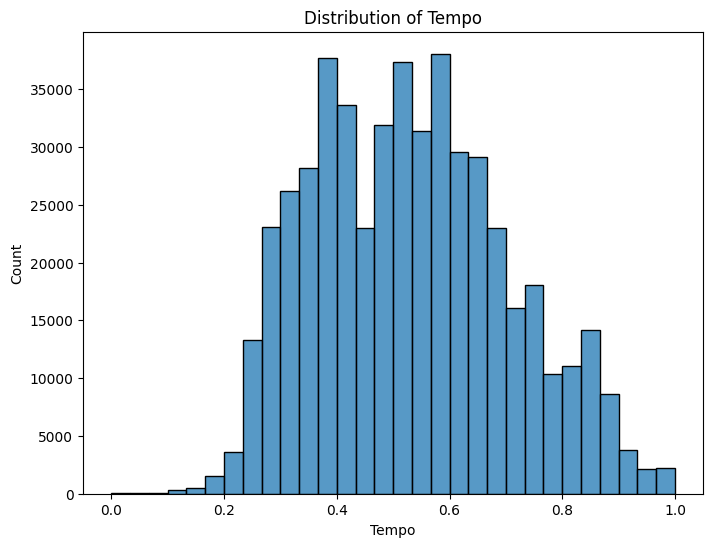

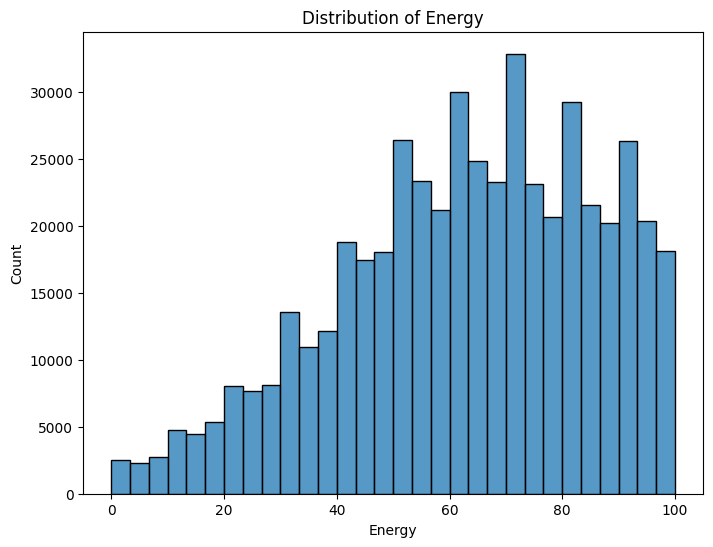

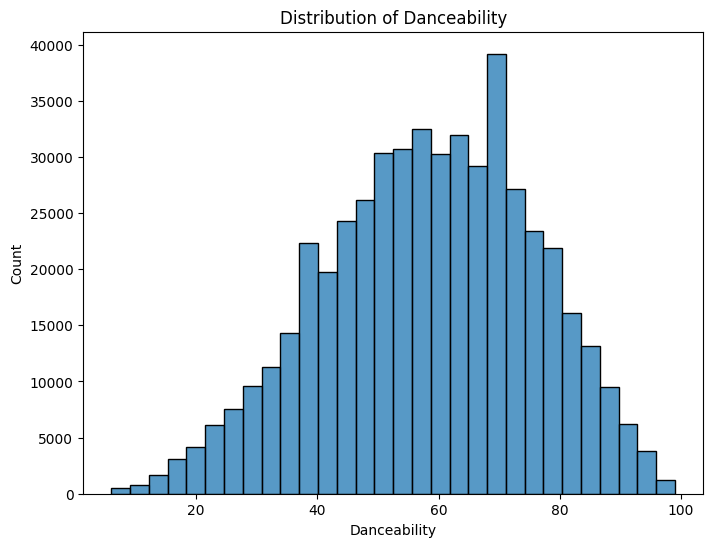

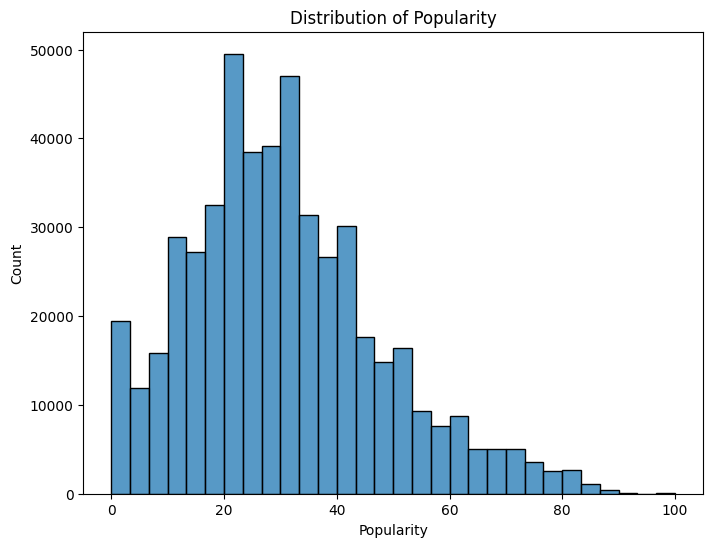

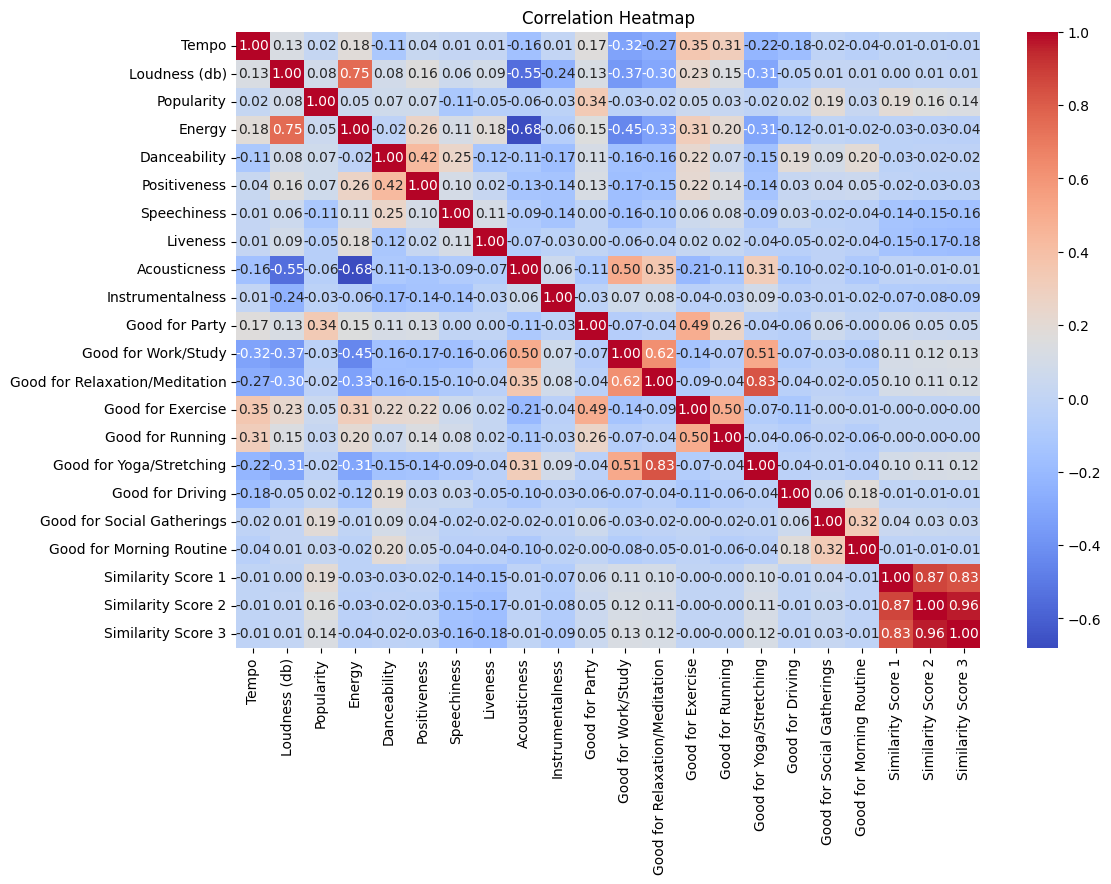

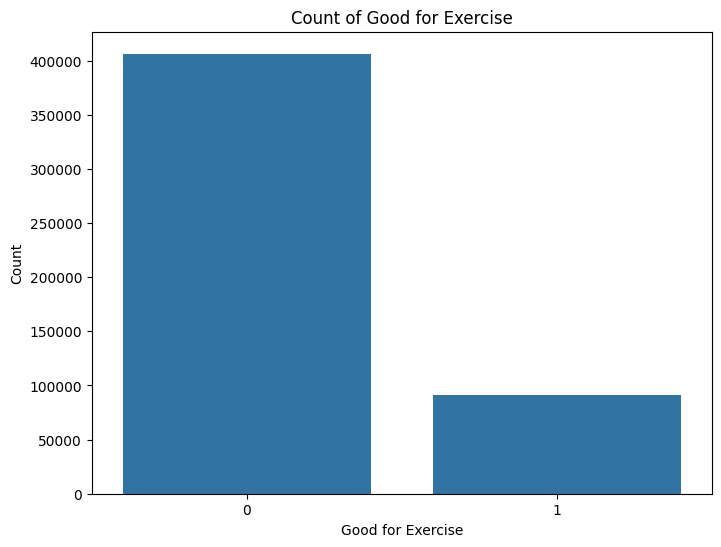

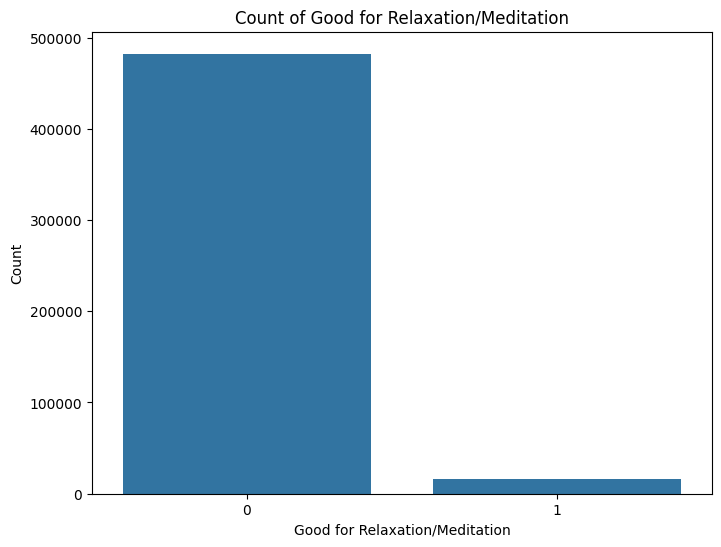

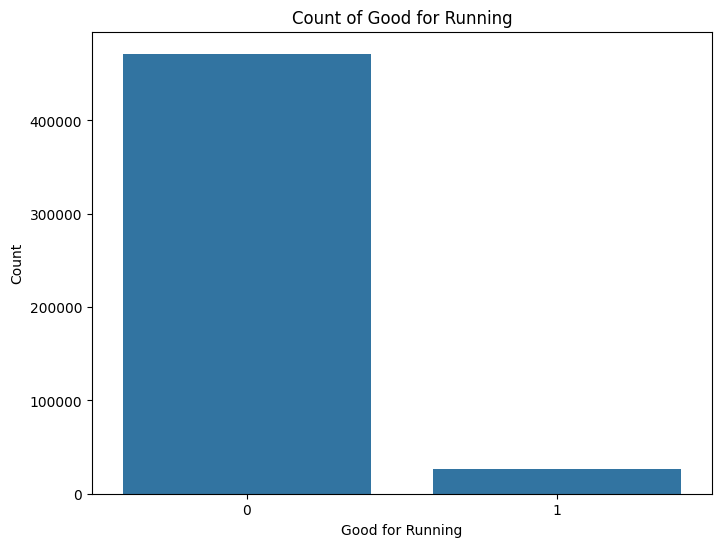

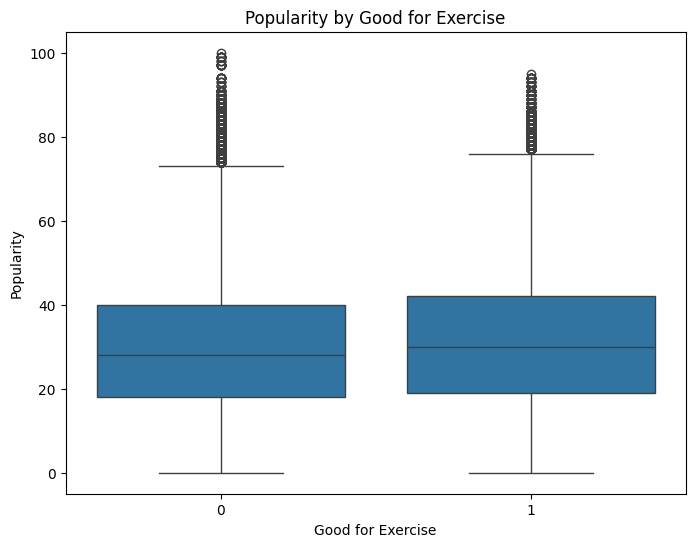

In [9]:

# Step 6: Data Cleaning
# Handle missing values (if any)
for col in ['Tempo', 'Loudness (db)', 'Energy', 'Danceability', 'Popularity']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Drop columns with excessive missing values (if applicable)
for col in df.columns:
    if df[col].isnull().sum() > len(df) * 0.5:  # Drop if >50% missing
        df.drop(col, axis=1, inplace=True)

# Verify missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Step 7: Exploratory Data Analysis
# Visualization 1: Histograms of key numerical features
numerical_cols = ['Tempo', 'Energy', 'Danceability', 'Popularity']
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# Visualization 2: Correlation heatmap
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 3: Count of binary indicators
binary_cols = ['Good for Exercise', 'Good for Relaxation/Meditation', 'Good for Running']
for col in binary_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# Visualization 4: Popularity by Good for Exercise
if 'Good for Exercise' in df.columns and 'Popularity' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Good for Exercise', y='Popularity', data=df)
    plt.title('Popularity by Good for Exercise')
    plt.xlabel('Good for Exercise')
    plt.ylabel('Popularity')
    plt.show()
